# **👗 Fashion MNIST**

📌 **About the Dataset — Fashion MNIST**

Fashion-MNIST is a dataset released by Zalando, containing 28×28 grayscale images of various clothing items. It includes **60,000 training** and **10,000 test** examples. Each image is represented as a 28×28 matrix with pixel values ranging from 0 to 255.


**👗 Class Labels (10 Categories)**

| Label | Category |
|-------|-----------|
| **0** | 👕 T-shirt / Top |
| **1** | 👖 Trouser |
| **2** | 🧶 Pullover |
| **3** | 👗 Dress |
| **4** | 🧥 Coat |
| **5** | 👡 Sandal |
| **6** | 👔 Shirt |
| **7** | 👟 Sneaker |
| **8** | 👜 Bag |
| **9** | 👢 Ankle Boot |


**📂 File Formats**

Fashion-MNIST is available in two formats:

- **CSV files** (label + flattened pixel values)

- **UBYTE files**

In this project, the data was processed and loaded using the UBYTE format.

# 1.🎯 Project Objective

The main objective of this project is to build a Convolutional Neural Network (CNN) model capable of accurately classifying images from the Fashion-MNIST dataset into 10 different clothing categories.  
CNNs are particularly effective for image-based tasks because they automatically learn spatial patterns such as edges, textures, and shapes.  


# 2.Data Understanding

Data reading, model evaluation and installation of necessary libraries for the model.

Data set link : [Kaggle - Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)

## 2.1 Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # Feature exyraction
from tensorflow.keras.layers import Dropout,Dense,Flatten,BatchNormalization # classification
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator # data augmentation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## 2.2 Google Colab Identity Verification

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 2.3 Downloading Data from Kaggle

In [5]:
# Install the Kaggle package
!pip install -q kaggle

In [ ]:
#  Upload your Kaggle API key
#  your Kaggle account -> Settings -> Account -> "Create New API Token"
from google.colab import files
files.upload()  # Upload the kaggle.json file here

In [ ]:
# Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# You can download the dataset
!kaggle datasets download -d zalando-research/fashionmnist

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 83% 57.0M/68.8M [00:00<00:00, 585MB/s]
100% 68.8M/68.8M [00:00<00:00, 517MB/s]


In [ ]:
# Unzip the file
!unzip fashionmnist.zip -d ./fashionmnist

Archive:  fashionmnist.zip
  inflating: ./fashionmnist/fashion-mnist_test.csv  
  inflating: ./fashionmnist/fashion-mnist_train.csv  
  inflating: ./fashionmnist/t10k-images-idx3-ubyte  
  inflating: ./fashionmnist/t10k-labels-idx1-ubyte  
  inflating: ./fashionmnist/train-images-idx3-ubyte  
  inflating: ./fashionmnist/train-labels-idx1-ubyte  


In [ ]:
%cd /gdrive

In [ ]:
pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=0da4a2dac9c0dda2d127a1a310852d88fc5878a715c546815ffea5d0a5532fc6
  Stored in directory: /root/.cache/pip/wheels/f7/48/00/ae031c97d62f39e1c3c4daa00426c09a65eb29ae5753a189ee
Successfully built idx2numpy


##2.4 Read the Ubyte files

train-images-idx3-ubyte →  Training images(28×28)

train-labels-idx1-ubyte → Training labels

t10k-images-idx3-ubyte → Test images

t10k-labels-idx1-ubyte → Test labels

----

**📌 What Is the UBYTE Format?**

- UBYTE is a raw binary file format where data is stored as **single-byte (unsigned byte) values ranging from 0 to 255.**
- It is typically used to store uncompressed pixel matrices or numerical arrays in a **fast, readable structure**.
- UBYTE files cannot be opened directly as images or text; the byte data must be converted into an array format using appropriate tools before processing.

In [ ]:
import idx2numpy

x_train = idx2numpy.convert_from_file('/content/fashionmnist/train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('/content/fashionmnist/train-labels-idx1-ubyte')

x_test = idx2numpy.convert_from_file('/content/fashionmnist/t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('/content/fashionmnist/t10k-labels-idx1-ubyte')


In [ ]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)  # (10000, 28, 28)
print(y_test.shape)  # (10000,)

(10000, 28, 28)
(10000,)


In [ ]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

## 2.5 Showing Samples from the Data Set

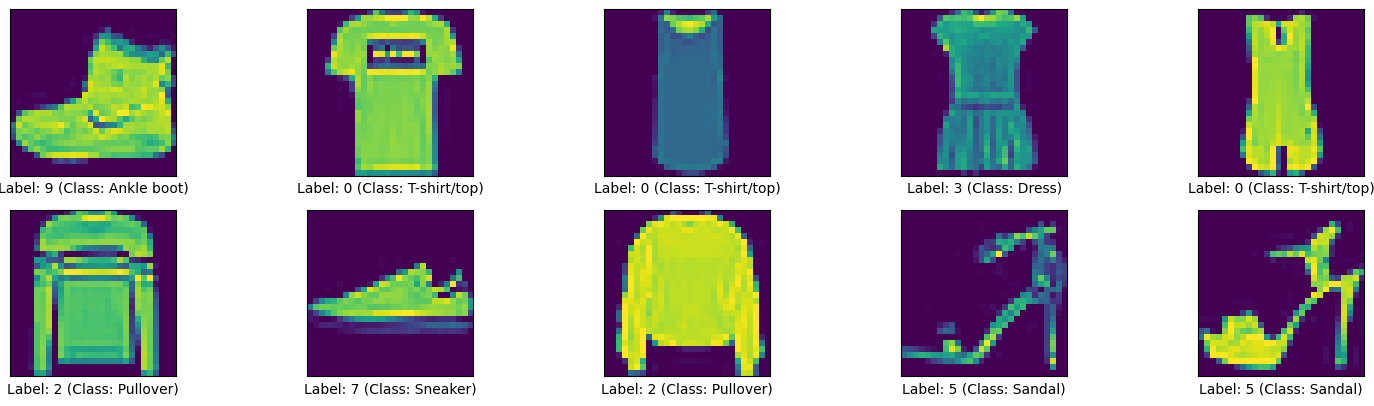

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15,10))

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])

  plt.xlabel(f"Label: {y_train[i]} (Class: {class_names[y_train[i]]})")

plt.tight_layout()
plt.show()

## 2.6 Distribution of the data set

In [ ]:
def plot_class_distribution(y, class_names, title="Class Distribution"):

    unique, counts = np.unique(y, return_counts=True)
    df = pd.DataFrame({
        "Label": unique,
        "Class": [class_names[i] for i in unique],
        "Count": counts
    })

    print(df)

    plt.figure(figsize=(10,5))
    plt.bar(df["Class"], df["Count"], color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()


   Label        Class  Count
0      0  T-shirt/top   6000
1      1      Trouser   6000
2      2     Pullover   6000
3      3        Dress   6000
4      4         Coat   6000
5      5       Sandal   6000
6      6        Shirt   6000
7      7      Sneaker   6000
8      8          Bag   6000
9      9   Ankle boot   6000


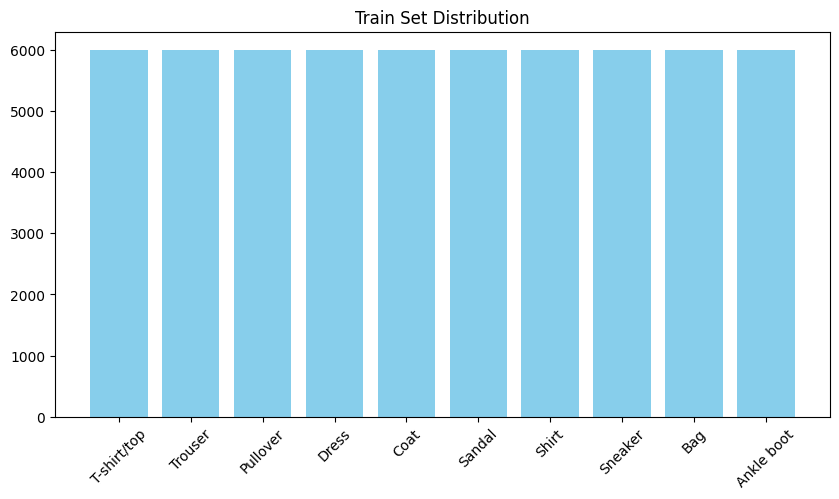

   Label        Class  Count
0      0  T-shirt/top   1000
1      1      Trouser   1000
2      2     Pullover   1000
3      3        Dress   1000
4      4         Coat   1000
5      5       Sandal   1000
6      6        Shirt   1000
7      7      Sneaker   1000
8      8          Bag   1000
9      9   Ankle boot   1000


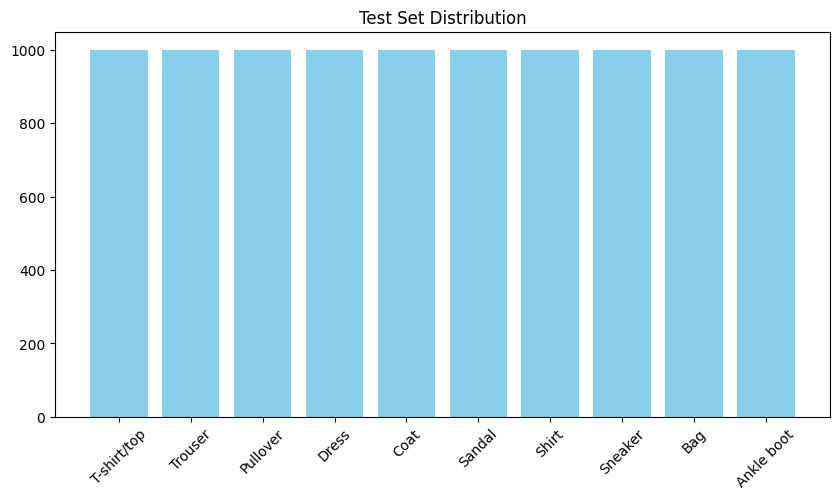

In [ ]:
plot_class_distribution(y_train, class_names, title="Train Set Distribution")
plot_class_distribution(y_test, class_names, title="Test Set Distribution")

# 3.Data Preparation

## 3.1 Image Normalization

**UBYTE → 0–255**

**Normalize → 0.0–1.0**

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 3.2 Data Aug : ImageDataGenerator

Creating new images using the images we have.

🔄 Data Augmentation

To improve the generalization of our CNN model and reduce overfitting, **data augmentation** was applied using Keras' `ImageDataGenerator`.  
This technique artificially increases the diversity of the training dataset by applying random transformations.

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=20, # rotate 20 degrees
    width_shift_range=0.1, # horizontally shift the image by 20%
    height_shift_range=0.1, # vertically
    shear_range = 0.2, # scrolling on the image
    zoom_range = 0.2,
    horizontal_flip = True, # taking symmetry
    fill_mode = "nearest" # When creating a new image, empty areas are revealed; for this, the nearest pixel values are used.
)


In [ ]:
train_generator = datagen.flow(
    x_train, y_train,
    batch_size=32,
    subset="training"
)

val_generator = datagen.flow(
    x_train, y_train,
    batch_size=32,
    subset="validation"
)

**Training - validation subsets**

* train_generator → takes 80% of the data

* validation_generator → takes 20% of the data

The two generators do not share any images, meaning the data is completely different.

# 4.Modelling : Create, compile and train

In [ ]:
model = Sequential()

# Feature Extraction : CNN => RELU => CONV => RELU = POOL => DROPOUT

model.add(Conv2D(128,(5,5),padding="same",activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(128,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Feature Extraction : CNN => RELU => CONV => RELU = POOL => DROPOUT

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Feature Extraction : CNN => RELU => CONV => RELU = POOL => DROPOUT

model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# Classification : FLATTEN => DENSE => RELU => BATCH-NORMALIZATION => DROPOUT

model.add(Flatten()) # 1D

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Classification : DENSE => RELU => BATCH-NORMALIZATION => DROPOUT => DENSE (OUTPUT LAYER)

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 24, 24, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 5, 5, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,354 (2.69 MB)

 Trainable params: 703,818 (2.68 MB)

 Non-trainable params: 1,536 (6.00 KB)

**Loss function:** y_train and y_test are currently 1D arrays in the form of numeric labels (0–9). **Therefore, `sparse_categorical_crossentropy` was used.**

**Note**: If one-hot encoding is performed, `categorical_crossentropy`  can be used.



In [ ]:
model.compile(optimizer= RMSprop(learning_rate=0.0001, decay=1e-6),
              loss = "sparse_categorical_crossentropy", # 0-9 integer target
              metrics=["accuracy"])

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=12,
                           verbose=1, mode='min'),
             ModelCheckpoint(filepath='/content/fashionmnist.keras',
                             monitor='val_loss', mode='min',
                             save_best_only=True, save_weights_only=False, verbose=1)]

In [ ]:
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3151 - loss: 2.1340
Epoch 1: val_loss improved from inf to 0.80877, saving model to /content/fashionmnist.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.3152 - loss: 2.1336 - val_accuracy: 0.6829 - val_loss: 0.8088
Epoch 2/60
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6220 - loss: 1.0503
Epoch 2: val_loss improved from 0.80877 to 0.73172, saving model to /content/fashionmnist.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6221 - loss: 1.0502 - val_accuracy: 0.7179 - val_loss: 0.7317
Epoch 3/60
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6721 - loss: 0.8941
Epoch 3: val_loss improved from 0.73172 to 0.63335, saving model to /content/fashionmnist.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.6721 - loss: 0.8940 - val_accuracy: 0.7537 - val_loss: 0.6333
Epoch 4/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7096 - loss: 0.78

##4.1 Graphics : Accuracy - Loss

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


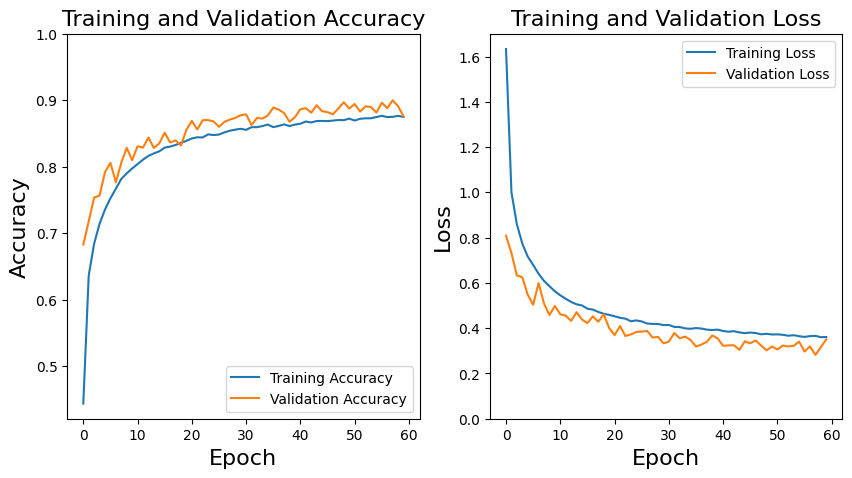

In [ ]:
# Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()

# 5.Evaluation

In [ ]:
best_model = load_model('/content/fashionmnist.keras')

best_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 24, 24, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 5, 5, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409,174 (5.38 MB)

 Trainable params: 703,818 (2.68 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 703,820 (2.68 MB)

In [ ]:
loss, acc = best_model.evaluate(x_test,y_test,batch_size=16)

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8937 - loss: 0.3100


In [ ]:
# results of best model
print(f'\nTest Accuracy: %.1f%%' % (100.0 * acc))
print(f'\nTest Loss: %.1f%%' % (100.0 * loss))


Test Accuracy: 89.3%

Test Loss: 30.9%


## 5.1 Classification Report- Confusion Matrix

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_pred = best_model.predict(x_test)  # (num_samples, 10)

y_pred = np.argmax(y_pred, axis=1) # highest probability classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.80      0.82      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.88      0.87      1000
       Dress       0.94      0.77      0.85      1000
        Coat       0.86      0.85      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.64      0.77      0.70      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.95      0.99      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



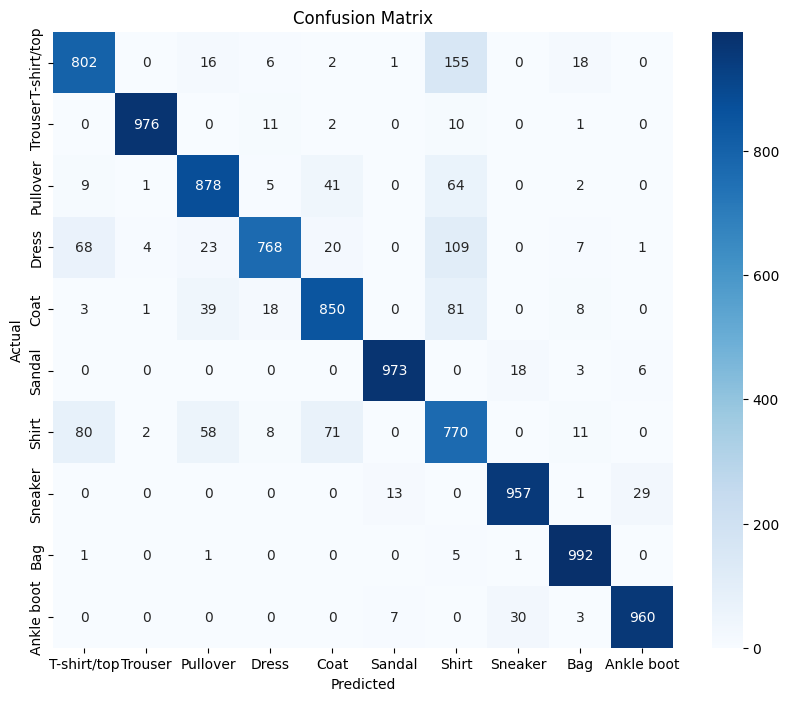

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
